# Edge Detector *(Using Laplace Operator)*

### imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### main variables

In [2]:
image_path = '../images/butterfly.jpg'

### functions

In [3]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

### read image

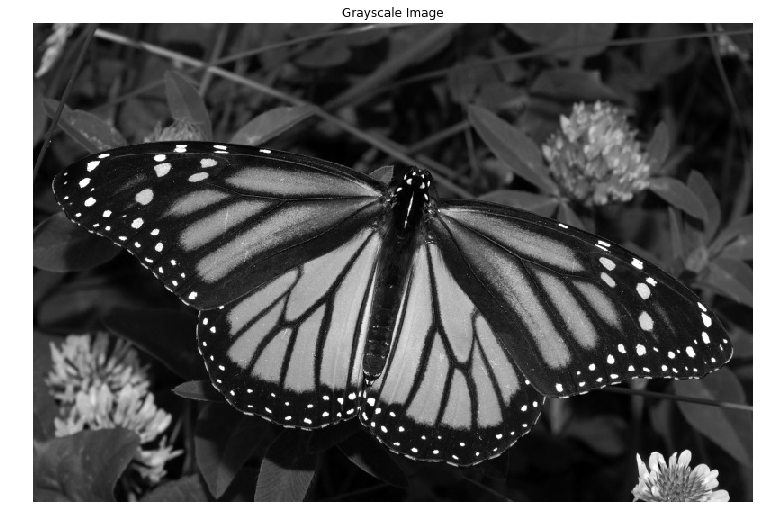

In [4]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'Grayscale Image')

### Operator & Convolution Class

In [5]:
class Operator:
    def __init__(self, kernel, center=None):
        if type(kernel) is not np.ndarray:
            kernel = np.asarray(kernel)
        if len(kernel.shape)!=2:
            raise Exception("Opeartor should be a 2D array")
        self.kernel = kernel
        
        if center is None:
            center = ((kernel.shape[0]-1)//2, (kernel.shape[1]-1)//2)
        self.center = center
        
        
    def __repr__(self):
        return "kernel: {} | center: {}".format(self.kernel, self.center).replace("\n"," ")
    
    def width(self):
        return self.kernel.shape[0]
    
    def height(self):
        return self.kernel.shape[1]
    
    def center_to_bottom_right(self):
        return center_to_right() , center_to_bottom()
    
    def center_to_right(self):
        return self.width() - 1 - self.center[0]
    
    def center_to_bottom(self):
        return self.height() - 1 - self.center[1]
    
    def apply_operator(self, gray):
        '''
        Convolution of the operator through the image
        '''
        imwidth = gray.shape[0]
        imheight = gray.shape[1]

        result = np.zeros_like(gray, dtype='int')
        for i in range(self.center[0],imwidth-self.center_to_right()):
            for j in range(self.center[1],imheight-self.center_to_bottom()):
                result[i,j] = np.sum(self.kernel*gray[i-self.center[0]:i+self.center_to_right()+1,j-self.center[1]:j+self.center_to_bottom()+1])
        
        return result

        

### Apply Laplace operators
*change to any other operator(s)*

In [6]:
laplace4 = Operator([
    [0, 1,0],
    [1,-4,1],
    [0, 1,0]
])

laplace8 = Operator(np.array([
    [1, 1,1],
    [1,-8,1],
    [1, 1,1]
]))

# operator1 = Operator(np.array([
#     [1, -1],
# ]))

# operator2 = Operator(np.array([
#     [ 1],
#     [-1]
# ]))

# LoG_operator = Operator(np.array([
#     [ 0, 0,-1, 0, 0],
#     [ 0,-1,-2,-1, 0],
#     [-1,-2,16,-2,-1],
#     [ 0,-1,-2,-1, 0],
#     [ 0, 0,-1, 0, 0],
# ]))


res4 = np.abs(laplace4.apply_operator(gray))
res8 = np.abs(laplace8.apply_operator(gray))

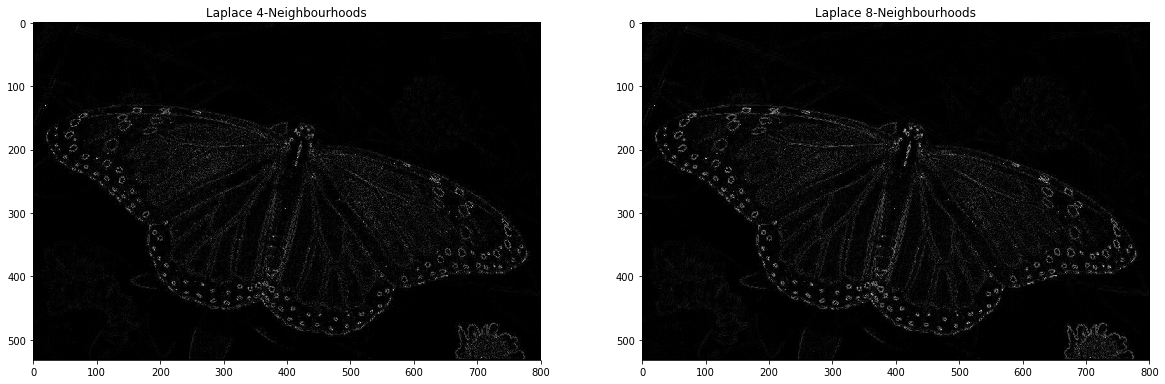

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(121), plt.title("Laplace 4-Neighbourhoods"), plt.imshow(res4, cmap='gray')
plt.subplot(122), plt.title("Laplace 8-Neighbourhoods"), plt.imshow(res8, cmap='gray')
plt.show()

### Thresholding

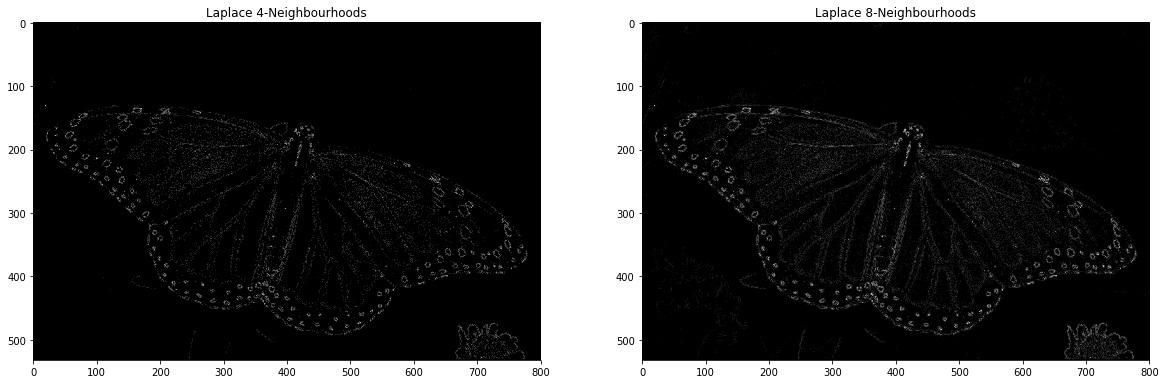

In [8]:
thresh=50
res4[res4<thresh] = 0
res8[res8<thresh] = 0

plt.figure(figsize=(20,20))
plt.subplot(121), plt.title("Laplace 4-Neighbourhoods"), plt.imshow(res4, cmap='gray')
plt.subplot(122), plt.title("Laplace 8-Neighbourhoods"), plt.imshow(res8, cmap='gray')
plt.show()